# Load Data

In [1]:
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten,Dropout
from keras.layers import Conv2D,BatchNormalization,MaxPooling2D,Reshape
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import os


In [2]:
data_folder = './EEG-Data'
os.chdir(data_folder)
print(os.getcwd())

/Users/aaron68lee/Documents/Coding-Projects/EEG-DL/EEG-Data


(2115, 22, 1000)


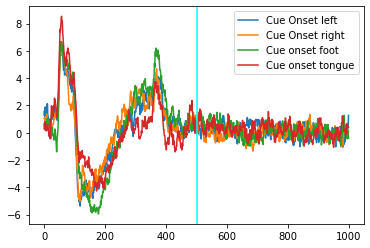

In [49]:
## Loading and visualizing the data

## Loading the dataset

X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")
person_train_valid = np.load("person_train_valid.npy")
X_train_valid = np.load("X_train_valid.npy")
print(X_train_valid.shape)
y_train_valid = np.load("y_train_valid.npy")
person_test = np.load("person_test.npy")

## Adjusting the labels so that 

# Cue onset left - 0
# Cue onset right - 1
# Cue onset foot - 2
# Cue onset tongue - 3

y_train_valid -= 769
y_test -= 769

## Visualizing the data

ch_data = X_train_valid[:,8,:]


class_0_ind = np.where(y_train_valid == 0)
ch_data_class_0 = ch_data[class_0_ind]
avg_ch_data_class_0 = np.mean(ch_data_class_0,axis=0)


class_1_ind = np.where(y_train_valid == 1)
ch_data_class_1 = ch_data[class_1_ind]
avg_ch_data_class_1 = np.mean(ch_data_class_1,axis=0)

class_2_ind = np.where(y_train_valid == 2)
ch_data_class_2 = ch_data[class_2_ind]
avg_ch_data_class_2 = np.mean(ch_data_class_2,axis=0)

class_3_ind = np.where(y_train_valid == 3)
ch_data_class_3 = ch_data[class_3_ind]
avg_ch_data_class_3 = np.mean(ch_data_class_3,axis=0)


plt.plot(np.arange(1000),avg_ch_data_class_0)
plt.plot(np.arange(1000),avg_ch_data_class_1)
plt.plot(np.arange(1000),avg_ch_data_class_2)
plt.plot(np.arange(1000),avg_ch_data_class_3)
plt.axvline(x=500, label='line at t=500',c='cyan')

plt.legend(["Cue Onset left", "Cue Onset right", "Cue onset foot", "Cue onset tongue"])






## Preprocess Data

In [ ]:
# apply label smoothing
'''
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize

# Define label smoothing factor
epsilon = 0.1

# Load your data
# Assuming you already have X_train_valid_prep, X_test_prep, y_train_valid, y_test

# Random splitting and reshaping the data
ind_valid = np.random.choice(2115, 500, replace=False)
ind_train = np.array(list(set(range(2115)).difference(set(ind_valid))))

# Creating the training and validation sets using the generated indices
x_train, x_valid = X_train_valid_prep[ind_train], X_train_valid_prep[ind_valid] 
y_train, y_valid = y_train_valid[ind_train], y_train_valid[ind_valid]

# Convert labels to one-hot encoding
num_classes = 4
y_train = label_binarize(y_train, classes=range(num_classes))
y_valid = label_binarize(y_valid, classes=range(num_classes))
y_test = label_binarize(y_test, classes=range(num_classes))

# Apply label smoothing
y_train_smooth = (1 - epsilon) * y_train + epsilon / num_classes
y_valid_smooth = (1 - epsilon) * y_valid + epsilon / num_classes
y_test_smooth = (1 - epsilon) * y_test + epsilon / num_classes

# Adding width of the segment to be 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1], x_train.shape[2], 1)
x_test = X_test_prep.reshape(X_test_prep.shape[0], X_test_prep.shape[1], X_test_prep.shape[2], 1)

# Reshaping the training and validation dataset
x_train = np.swapaxes(x_train, 1, 3)
x_train = np.swapaxes(x_train, 1, 2)
x_valid = np.swapaxes(x_valid, 1, 3)
x_valid = np.swapaxes(x_valid, 1, 2)
x_test = np.swapaxes(x_test, 1, 3)
x_test = np.swapaxes(x_test, 1, 2)

print('Shape of training set after dimension reshaping:', x_train.shape)
print('Shape of validation set after dimension reshaping:', x_valid.shape)
print('Shape of test set after dimension reshaping:', x_test.shape)
print("Shape of smoothed training labels:", y_train_smooth.shape)
print("Shape of smoothed validation labels:", y_valid_smooth.shape)
print("Shape of smoothed test labels:", y_test_smooth.shape)
'''

In [50]:

## Preprocessing the dataset

X_train_valid_prep = X_train_valid[:,:,0:500]
X_test_prep = X_test[:,:,0:500]

print(X_train_valid_prep.shape)
print(y_train_valid.shape)
print(X_test_prep.shape)
print(y_test.shape)


## Random splitting and reshaping the data

# First generating the training and validation indices using random splitting
ind_valid = np.random.choice(2115, 500, replace=False)
ind_train = np.array(list(set(range(2115)).difference(set(ind_valid))))

# Creating the training and validation sets using the generated indices
(x_train, x_valid) = X_train_valid_prep[ind_train], X_train_valid_prep[ind_valid] 
(y_train, y_valid) = y_train_valid[ind_train], y_train_valid[ind_valid]
print('Shape of training set:',x_train.shape)
print('Shape of validation set:',x_valid.shape)
print('Shape of training labels:',y_train.shape)
print('Shape of validation labels:',y_valid.shape)


# Converting the labels to categorical variables for multiclass classification
y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid, 4)
y_test = to_categorical(y_test, 4)
print('Shape of training labels after categorical conversion:',y_train.shape)
print('Shape of validation labels after categorical conversion:',y_valid.shape)
print('Shape of test labels after categorical conversion:',y_test.shape)

x_test = X_test_prep
'''
# Adding width of the segment to be 1
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_valid = x_valid.reshape(x_valid.shape[0], x_valid.shape[1], x_train.shape[2], 1)
x_test = X_test_prep.reshape(X_test_prep.shape[0], X_test_prep.shape[1], X_test_prep.shape[2], 1)
print('Shape of training set after adding width info:',x_train.shape)
print('Shape of validation set after adding width info:',x_valid.shape)
print('Shape of test set after adding width info:',x_test.shape)

# Reshaping the training and validation dataset
x_train = np.swapaxes(x_train, 1,3)
x_train = np.swapaxes(x_train, 1,2)
x_valid = np.swapaxes(x_valid, 1,3)
x_valid = np.swapaxes(x_valid, 1,2)
x_test = np.swapaxes(x_test, 1,3)
x_test = np.swapaxes(x_test, 1,2)
'''

print('Shape of training set after dimension reshaping:',x_train.shape)
print('Shape of validation set after dimension reshaping:',x_valid.shape)
print('Shape of test set after dimension reshaping:',x_test.shape)

(2115, 22, 500)
(2115,)
(443, 22, 500)
(443,)
Shape of training set: (1615, 22, 500)
Shape of validation set: (500, 22, 500)
Shape of training labels: (1615,)
Shape of validation labels: (500,)
Shape of training labels after categorical conversion: (1615, 4)
Shape of validation labels after categorical conversion: (500, 4)
Shape of test labels after categorical conversion: (443, 4)
Shape of training set after dimension reshaping: (1615, 22, 500)
Shape of validation set after dimension reshaping: (500, 22, 500)
Shape of test set after dimension reshaping: (443, 22, 500)


# LSTM Model Architecture

In [5]:
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM

## PyTorch

In [6]:


# Define LSTM model
class SimpleLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Use the last time step for classification
        return out
    
'''
# alternative architecture

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(1, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])  # Take the last time step's output
        return out

'''
    
def evaluate_model(model, criterion, X_val, y_val, batch_size=64):
    model.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    # Assume val data are PyTorch tensors
  
    val_dataset = TensorDataset(X_val, y_val)
    val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

    with torch.no_grad():
        for inputs, labels in val_dataloader:
            inputs = inputs.squeeze(1)  # Remove the extra dimension
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    accuracy = correct / total
    average_loss = val_loss / len(val_dataloader)

    return average_loss, accuracy

'''
# Function to evaluate the model on validation data
def evaluate_model(model, criterion, X_val, y_val):
    with torch.no_grad():
        outputs = model(X_val)
        loss = criterion(outputs, y_val)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_val).float().mean().item()
    return loss.item(), accuracy
'''

'\n# Function to evaluate the model on validation data\ndef evaluate_model(model, criterion, X_val, y_val):\n    with torch.no_grad():\n        outputs = model(X_val)\n        loss = criterion(outputs, y_val)\n        _, predicted = torch.max(outputs, 1)\n        accuracy = (predicted == y_val).float().mean().item()\n    return loss.item(), accuracy\n'

In [7]:
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    train_losses = []
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        epoch_train_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            print("input:", inputs.shape)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            epoch_train_loss += loss.item() * inputs.size(0)
        train_losses.append(epoch_train_loss / len(train_loader.dataset))

        model.eval()
        epoch_val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                print("val inputs", inputs.shape)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                epoch_val_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        val_losses.append(epoch_val_loss / len(val_loader.dataset))
        val_accuracies.append(correct / total)

        print(f'Epoch [{epoch+1}/{num_epochs}], '
              f'Train Loss: {train_losses[-1]:.4f}, '
              f'Val Loss: {val_losses[-1]:.4f}, '
              f'Val Accuracy: {val_accuracies[-1]:.4f}')

    return train_losses, val_losses, val_accuracies


In [8]:
# Load data for model

############ Hyperparams #############

batch_size = 64
hidden_size = 64
lr = 1e-3
num_epochs = 8

############ ############# #############

# Assuming X_train, X_valid, X_test have shapes (samples, time_steps, 1, features)

print("X_train", x_train.shape)
print("X_valid", x_valid.shape)
print("x_test", x_test.shape)

# Squeeze the singleton dimension
x_train_flattened = np.squeeze(x_train, axis=2)
x_valid_flattened = np.squeeze(x_valid, axis=2)
x_test_flattened = np.squeeze(x_test, axis=2)

# Convert to PyTorch tensors
x_train_tensor = torch.Tensor(x_train_flattened)
y_train_tensor = torch.LongTensor(np.argmax(y_train, axis=1))

x_valid_tensor = torch.Tensor(x_valid_flattened)
y_valid_tensor = torch.LongTensor(np.argmax(y_valid, axis=1))

x_test_tensor = torch.Tensor(x_test_flattened)
y_test_tensor = torch.LongTensor(np.argmax(y_test, axis=1))


print("x_test", x_test_tensor.shape)
print("Y_train", y_train_tensor.shape)
print("Y_valid", y_valid_tensor.shape)

# Create DataLoaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(x_valid_tensor, y_valid_tensor)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

X_train (1615, 500, 1, 22)
X_valid (500, 500, 1, 22)
x_test (443, 500, 1, 22)
x_test torch.Size([443, 500, 22])
Y_train torch.Size([1615])
Y_valid torch.Size([500])


In [10]:
input_size = x_train.shape[2]
output_size = 4

model = SimpleLSTM(input_size, hidden_size, output_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

print("model training...")
train_losses, val_losses, val_accuracies = train_model(model, criterion, optimizer, train_dataloader, val_dataloader, num_epochs)

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Validation Accuracy')
plt.show()


model training...
input: torch.Size([64, 500, 22])


RuntimeError: input.size(-1) must be equal to input_size. Expected 1, got 22

## Old LSTM Code

In [ ]:


# Convert to PyTorch tensors
X_train_valid_tensor = torch.Tensor(X_train_valid)
y_train_valid_tensor = torch.LongTensor(y_train_valid)

print(x_valid.shape)
print(y_valid.shape)
X_val_tensor = torch.Tensor(x_valid)
y_val_tensor = torch.LongTensor(y_valid)
print(X_val_tensor.shape)
print(y_val_tensor.shape)

############ Hyperparams #############

batch_size = 64
hidden_size = 64
lr = 1e-3
num_epochs = 20

############ ############# #############

# Create DataLoader
dataset = TensorDataset(X_train_valid_tensor, y_train_valid_tensor)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize model

input_size = X_train_valid.shape[2]  # 3rd dim is num_features
output_size = 4  # Number of classes
model = SimpleLSTM(input_size, hidden_size, output_size)

# Load model (if needed)
pretrained = False
if pretrained:
    model.load_state_dict(torch.load('lstm_model.pth'))
    model.eval()  # Set the model to evaluation mode

else:

    # Define loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Training model
    # Then Evaluate the model on validation data
    val_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        for inputs, labels in dataloader:
            print(inputs.shape)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        # Evaluate on validation data after each epoch
        model.eval()  # Set the model to evaluation mode
        with torch.no_grad():
            val_loss, val_accuracy = evaluate_model(model, criterion, X_val_tensor, y_val_tensor, batch_size=batch_size)
            val_losses.append(val_loss)
            val_accuracies.append(val_accuracy)
            print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item()}, Validation Accuracy: {val_accuracy}')

    # Save the trained model if needed
    torch.save(model.state_dict(), 'lstm_model.pth')


In [ ]:


# Plot the loss curve and accuracy curve
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(val_losses, label='Validation Loss')
plt.title('Validation Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## Keras

In [ ]:

############ Hyperparams #############

batch_size = 64
hidden_size = 64
lr = 1e-3
num_epochs = 8

############ ############# #############

# Assuming X_train, X_valid, X_test have shapes (samples, time_steps, 1, features)

print("X_train", x_train.shape)
print("X_valid", x_valid.shape)
print("x_test", x_test.shape)

# Squeeze the singleton dimension
x_train_flattened = np.squeeze(x_train, axis=2)
x_valid_flattened = np.squeeze(x_valid, axis=2)
x_test_flattened = np.squeeze(x_test, axis=2)

# Convert to PyTorch tensors
x_train_tensor = torch.Tensor(x_train_flattened)
y_train_tensor = torch.LongTensor(np.argmax(y_train, axis=1))

x_valid_tensor = torch.Tensor(x_valid_flattened)
y_valid_tensor = torch.LongTensor(np.argmax(y_valid, axis=1))

x_test_tensor = torch.Tensor(x_test_flattened)
y_test_tensor = torch.LongTensor(np.argmax(y_test, axis=1))


print("x_test", x_test_tensor.shape)
print("Y_train", y_train_tensor.shape)
print("Y_valid", y_valid_tensor.shape)

# Create DataLoaders
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = TensorDataset(x_valid_tensor, y_valid_tensor)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

test_dataset = TensorDataset(x_test_tensor, y_test_tensor)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

############ Hyperparams #############

batch_size = 64
hidden_size = 64
lr = 1e-3
num_epochs = 30
dropout = 0.5

############ ############# #############

# Convert to numpy arrays
X_train_valid_np = np.array(X_train_valid)
y_train_valid_np = np.array(y_train_valid)

print("X_train_valid_np shape", X_train_valid_np.shape)
print("X_train_valid_np shape", X_train_valid_np.shape)

# Split the data into training and validation sets
'''
X_train, X_val, y_train, y_val = train_test_split(X_train_valid_np, y_train_valid_np, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

'''

X_train = np.array(x_train)
X_val = np.array(x_valid)
X_test = np.array(x_test)

y_train = np.array(y_train)
y_val = np.array(y_valid)
y_test = np.array(y_test)

y_train_reshaped = np.argmax(y_train, axis=1)
y_val_reshaped = np.argmax(y_val, axis=1)
y_test_reshaped = np.argmax(y_test, axis=1)

print()
print("X train shape", X_train.shape)
print("X val shape", X_val.shape)
print("X test shape", X_test.shape)
print("y train shape", y_train.shape)
print("y val shape", y_val.shape)
print("y test", y_test.shape)


# Define the LSTM model
# old model

# model = Sequential()
# model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(Dense(4, activation='softmax'))  # Adjust based on the number of classes


# New model
model = Sequential()

# Add the first LSTM layer with dropout
model.add(LSTM(units=128, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(dropout))

# Add a second LSTM layer with dropout
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(dropout))

# Add a third LSTM layer
model.add(LSTM(units=32))
model.add(Dropout(dropout))

# Add a dense layer for final classification
model.add(Dense(units=4, activation='softmax'))

# Compile the model

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer=Adam(learning_rate=lr), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# load model in keras
# loaded_model = load_model('lstm_model.h5')

# Training the model
history = model.fit(X_train, y_train_reshaped, 
                    epochs=num_epochs, 
                    validation_data=(X_val, y_val_reshaped), 
                    batch_size=batch_size,
                    )#callbacks=[early_stopping])

# Save the trained model
model.save('lstm_model2.h5')




X_train_valid_np shape (2115, 22, 1000)
X_train_valid_np shape (2115, 22, 1000)

X train shape (1615, 22, 500)
X val shape (500, 22, 500)
X test shape (443, 22, 500)
y train shape (1615, 4)
y val shape (500, 4)
y test (443, 4)
Epoch 1/30
26/26 [==============================] - 6s 87ms/step - loss: 1.3907 - accuracy: 0.2724 - val_loss: 1.3741 - val_accuracy: 0.2940
Epoch 2/30
26/26 [==============================] - 1s 53ms/step - loss: 1.2546 - accuracy: 0.4489 - val_loss: 1.3995 - val_accuracy: 0.3040
Epoch 3/30
26/26 [==============================] - 2s 66ms/step - loss: 1.0557 - accuracy: 0.5783 - val_loss: 1.5612 - val_accuracy: 0.2880
Epoch 4/30
26/26 [==============================] - 1s 53ms/step - loss: 0.8136 - accuracy: 0.7146 - val_loss: 1.8129 - val_accuracy: 0.3120
Epoch 5/30
26/26 [==============================] - 2s 72ms/step - loss: 0.5808 - accuracy: 0.8186 - val_loss: 2.1183 - val_accuracy: 0.3040
Epoch 6/30
26/26 [==============================] - 3s 100ms/step - 

# Model Performance

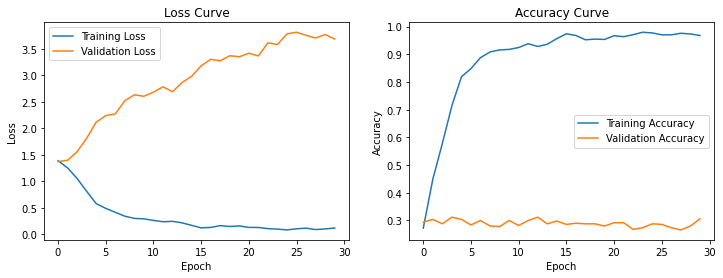

In [62]:

# Plotting the loss curve and accuracy curve
plt.figure(figsize=(12, 4))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [63]:
## Testing the basic LSTM model

print("X test", X_test.shape)
print("y test", y_test.shape)

test_loss, test_acc = model.evaluate(X_test, y_test_reshaped, verbose=0)
print('Test accuracy of the basic LSTM model:', test_acc)

X test (443, 22, 500)
y test (443, 4)
Test accuracy of the basic LSTM model: 0.30248308181762695
